In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.stats.mstats import winsorize

In [2]:
import os

cwd = os.getcwd()

parent = os.path.dirname(cwd)

parent

'/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project'

In [3]:
input_dir = parent+r"/data/merged_demand_review_data"

#df = pd.read_csv(os.path.join(input_dir,r"rdd_data_2022.csv"))
chicago = pd.read_excel(os.path.join(input_dir,r"chicago_data.xlsx"))
houston = pd.read_excel(os.path.join(input_dir,r"houston_data.xlsx"))
miami = pd.read_excel(os.path.join(input_dir,r"miami_data.xlsx"))

In [4]:
df = pd.concat([chicago,houston,miami],axis=0)
df["year_month"]  = pd.to_datetime(df["year_month"])
df["year_month"] = df["year_month"].dt.to_period("M")


In [5]:
#df["ln_revenue"] = np.log(df["Revenue"])

In [6]:
df["ln_revpar"] = np.log(df["RevPAR"])
df["ln_adr"] = np.log(df["ADR"])
df["ln_occ"] = np.log(df["Occ"])

In [7]:
df = df.rename(columns={"SHARE ID":"shareid"})

In [8]:
#df["ln_accum_rating"] = np.log(df["accum_rating"])
#df["ln_num_of_reviews"] = np.log(df["num_of_reviews"])
df["Market"].unique()

array(['Chicago, IL', 'Houston, TX', 'Nashville, TN', 'Miami/Hialeah, FL'],
      dtype=object)

In [9]:
df.groupby("Operation")["shareid"].nunique()

Operation
1    138
2    293
3     91
Name: shareid, dtype: int64

In [10]:

df["Occ_next_1m"] = df.groupby("shareid")["Occ"].shift(periods=-1)
df["ln_revpar_next_1m"] = df.groupby("shareid")["ln_revpar"].shift(periods=-1)
'''

df["ln_revenue_next_2m"] = df.groupby("shareid")["ln_revenue"].shift(periods=-2)
df["ln_revpar_next_2m"] = df.groupby("shareid")["ln_revpar"].shift(periods=-2)

df["ln_revenue_next_3m"] = df.groupby("shareid")["ln_revenue"].shift(periods=-3)
df["ln_revpar_next_3m"] = df.groupby("shareid")["ln_revpar"].shift(periods=-3)

df["ln_revenue_next_4m"] = df.groupby("shareid")["ln_revenue"].shift(periods=-4)
df["ln_revpar_next_4m"] = df.groupby("shareid")["ln_revpar"].shift(periods=-4)

df["ln_revenue_next_5m"] = df.groupby("shareid")["ln_revenue"].shift(periods=-4)
df["ln_revpar_next_5m"] = df.groupby("shareid")["ln_revpar"].shift(periods=-4)

df["ln_revenue_next_6m"] = df.groupby("shareid")["ln_revenue"].shift(periods=-6)
df["ln_revpar_next_6m"] = df.groupby("shareid")["ln_revpar"].shift(periods=-6)
'''

'\n\ndf["ln_revenue_next_2m"] = df.groupby("shareid")["ln_revenue"].shift(periods=-2)\ndf["ln_revpar_next_2m"] = df.groupby("shareid")["ln_revpar"].shift(periods=-2)\n\ndf["ln_revenue_next_3m"] = df.groupby("shareid")["ln_revenue"].shift(periods=-3)\ndf["ln_revpar_next_3m"] = df.groupby("shareid")["ln_revpar"].shift(periods=-3)\n\ndf["ln_revenue_next_4m"] = df.groupby("shareid")["ln_revenue"].shift(periods=-4)\ndf["ln_revpar_next_4m"] = df.groupby("shareid")["ln_revpar"].shift(periods=-4)\n\ndf["ln_revenue_next_5m"] = df.groupby("shareid")["ln_revenue"].shift(periods=-4)\ndf["ln_revpar_next_5m"] = df.groupby("shareid")["ln_revpar"].shift(periods=-4)\n\ndf["ln_revenue_next_6m"] = df.groupby("shareid")["ln_revenue"].shift(periods=-6)\ndf["ln_revpar_next_6m"] = df.groupby("shareid")["ln_revpar"].shift(periods=-6)\n'

In [11]:
'''
df["ln_revenue_next_3m_avg"] = (df["ln_revenue_next_1m"]+df["ln_revenue_next_2m"]+df["ln_revenue_next_3m"])/3
df["ln_revpar_next_3m_avg"] = (df["ln_revpar_next_1m"]+df["ln_revpar_next_2m"]+df["ln_revpar_next_3m"])/3

df["ln_revenue_next_6m_avg"] = (df["ln_revenue_next_1m"]+df["ln_revenue_next_2m"]+df["ln_revenue_next_3m"]+\
                                df["ln_revenue_next_4m"]+df["ln_revenue_next_5m"]+df["ln_revenue_next_6m"])/6

df["ln_revpar_next_6m_avg"] = (df["ln_revpar_next_1m"]+df["ln_revpar_next_2m"]+df["ln_revpar_next_3m"]+\
                              df["ln_revpar_next_4m"]+df["ln_revpar_next_5m"]+df["ln_revpar_next_6m"])/3
'''                              

'\ndf["ln_revenue_next_3m_avg"] = (df["ln_revenue_next_1m"]+df["ln_revenue_next_2m"]+df["ln_revenue_next_3m"])/3\ndf["ln_revpar_next_3m_avg"] = (df["ln_revpar_next_1m"]+df["ln_revpar_next_2m"]+df["ln_revpar_next_3m"])/3\n\ndf["ln_revenue_next_6m_avg"] = (df["ln_revenue_next_1m"]+df["ln_revenue_next_2m"]+df["ln_revenue_next_3m"]+                                df["ln_revenue_next_4m"]+df["ln_revenue_next_5m"]+df["ln_revenue_next_6m"])/6\n\ndf["ln_revpar_next_6m_avg"] = (df["ln_revpar_next_1m"]+df["ln_revpar_next_2m"]+df["ln_revpar_next_3m"]+                              df["ln_revpar_next_4m"]+df["ln_revpar_next_5m"]+df["ln_revpar_next_6m"])/3\n'

In [12]:
df["year"] = df["year_month"].dt.year
df["month"] = df["year_month"].dt.month

In [14]:
#http://localhost:8888/notebooks/src/02%20RDD%20Data%20Prep.ipynb
#df = df[df["Market"]!="Nashville, TN"]
df = df[df["year"]<=2016]

In [15]:
df.groupby("Operation")["shareid"].nunique()

Operation
1    137
2    287
3     90
Name: shareid, dtype: int64

In [16]:
df.groupby("Operation").count()

,shareid,year_month,Supply,Demand,Revenue,Occ,ADR,RevPAR,Country,Market,...,total_four_star_%,total_five_star_%,is_reviewed,ln_revpar,ln_adr,ln_occ,Occ_next_1m,ln_revpar_next_1m,year,month
Operation,,,,,,,,,,,,,,,,,,,,,
1,22050,22050,22050,22050,22050,22050,22050,22050,22050,22050,...,12692,12692,22050,22050,22050,22050,22044,22044,22050,22050
2,36489,36489,36489,36489,36489,36489,36489,36489,36489,36489,...,25417,25417,36489,36489,36489,36489,36485,36485,36489,36489
3,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,...,6230,6230,9134,9134,9134,9134,9108,9108,9134,9134


In [17]:
#df[["Occ","ADR","RevPAR","Operation"]].groupby("Operation").describe().to_csv(r"summary_by_chain_rdd.csv")

In [18]:
#df[df["year_month"] == '2019-12']["num_of_reviews"].sum()

In [19]:
# fill missing rating data for hotels that are not on TripAdvisor

#df["post_month"] = df["year_month"].dt.to_period('M')

l=[]

hotels=df.groupby("shareid")

for name, h in hotels:
    h_resample = h.set_index('year_month').resample('M').asfreq().bfill().reset_index(level=0, drop=False)
    l.append(h_resample)
    
df = pd.concat(l,axis=0)


In [20]:
df["Location"].unique()

array([5, 2, 1, 3])

In [21]:
#df_on_ta = df[(df["on_ta"]==1)&(df["monthly_review_count"]!=0)]

In [22]:
#df_on_ta["monthly_review_count"].describe()

In [23]:
#df_on_ta.columns

In [24]:
#df_on_ta[["monthly_rating_mean","monthly_review_count","Operation"]].groupby("Operation").describe().to_csv(r"summary_rating_by_chain_rdd.csv")



In [26]:
df_reviewed = df[df["is_reviewed"]==1]

In [27]:
df_year = df_reviewed.groupby("year")["monthly_rating_mean"].mean().reset_index()
df_year

,year,monthly_rating_mean
0,2002,1.166667
1,2003,1.452199
2,2004,1.688683
3,2005,1.654553
4,2006,1.653924
5,2007,1.653772
6,2008,1.822906
7,2009,2.028579
8,2010,2.201371
9,2011,2.573171


In [28]:
list(df.columns)

['year_month',
 'shareid',
 'Supply',
 'Demand',
 'Revenue',
 'Occ',
 'ADR',
 'RevPAR',
 'Country',
 'Market',
 'Chain',
 'Owner',
 'Mgmt',
 'ParentCompany',
 'Operation',
 'Scale',
 'Class',
 'Location',
 'OpenDate',
 'SizeCode',
 'max_str_month',
 'max_review_month',
 'min_review_month',
 'on_ta',
 'monthly_rating_mean',
 'monthly_review_count',
 'monthly_one_star_count',
 'monthly_two_star_count',
 'monthly_three_star_count',
 'monthly_four_star_count',
 'monthly_five_star_count',
 'monthly_hotel_response_count',
 'monthly_partnership_reviews_count',
 'cleanliness_count',
 'cleanliness_mean',
 'location_count',
 'location_mean',
 'sleep_quality_count',
 'sleep_quality_mean',
 'room_quality_count',
 'room_quality_mean',
 'service_count',
 'service_mean',
 'value_count',
 'value_mean',
 'renovate',
 'solo_count',
 'couple_count',
 'family_count',
 'business_count',
 'month_with_reviews',
 'num_of_reviews',
 'total_one_star',
 'total_two_star',
 'total_three_star',
 'total_four_star',


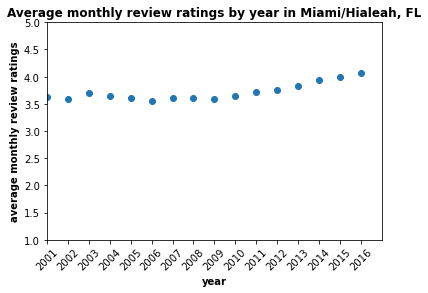

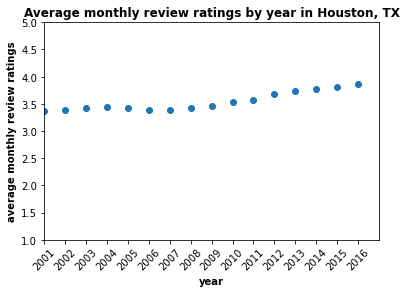

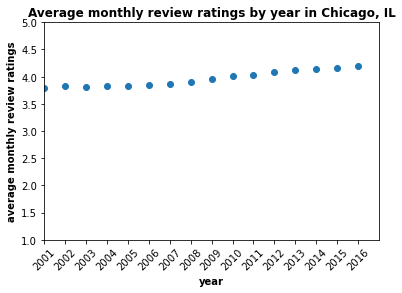

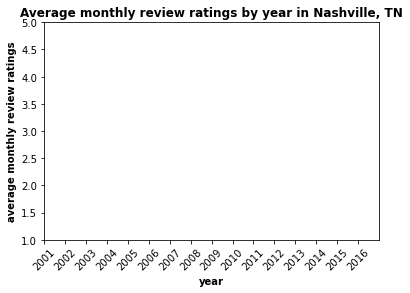

In [41]:
# ploting review by year

for i in list(df["Market"].unique()):
    df_reviewed_test = df[df["Market"]==i]
    df_year = df_reviewed_test.groupby(["year"])["accum_rating"].mean().reset_index()

    fig, ax = plt.subplots()

    ax.scatter(df_year["year"], df_year["accum_rating"])
    ax.set_xlim(2001, 2017)
    ax.set_ylim(1, 5)
    ax.set_xlabel('year', 
                   fontweight ='bold')
    ax.set_ylabel('average monthly review ratings', 
                   fontweight ='bold')

    ax.set_title('Average monthly review ratings by year in {}'.format(i), fontsize = 12, fontweight ='bold')
    plt.xticks(np.arange(2001,2017,1), rotation=45)

([<matplotlib.axis.XTick at 0x7ff0dac54590>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

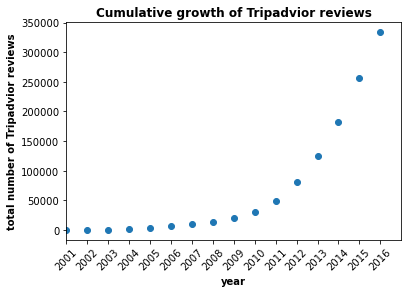

In [35]:
# ploting review by year
df_year = df[df["month"]==12].groupby("year")[["num_of_reviews"]].sum().reset_index()

fig, ax = plt.subplots()
  
ax.scatter(df_year["year"], df_year["num_of_reviews"])
ax.set_xlim(2001, 2017)
ax.set_xlabel('year', 
               fontweight ='bold')
ax.set_ylabel('total number of Tripadvior reviews', 
               fontweight ='bold')

ax.set_title('Cumulative growth of Tripadvior reviews', fontsize = 12, fontweight ='bold')
plt.xticks(np.arange(2001,2017,1), rotation=45)

## All data

In [25]:
# get displayed rating
df['displayed_rating'] = np.select([
    (df["accum_rating"] < 1.25),
    (df["accum_rating"] >= 1.25) & (df["accum_rating"] < 1.75),
    (df["accum_rating"] >= 1.75) & (df["accum_rating"] < 2.25),
    (df["accum_rating"] >= 2.25) & (df["accum_rating"] < 2.75),
    (df["accum_rating"] >= 2.75) & (df["accum_rating"] < 3.25),
    (df["accum_rating"] >= 3.25) & (df["accum_rating"] < 3.75),
    (df["accum_rating"] >= 3.75) & (df["accum_rating"] < 4.25),
    (df["accum_rating"] >= 4.25) & (df["accum_rating"] < 4.75),
    (df["accum_rating"] >= 4.75) & (df["accum_rating"] < 5)
], [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])


In [26]:
'''\df["accum_rating"] = df["accum_rating"].fillna(0)
def round_off_rating(number):
    """Round a number to the closest half integer.
    >>> round_off_rating(1.3)
    1.5
    >>> round_off_rating(2.6)
    2.5
    >>> round_off_rating(3.0)
    3.0
    >>> round_off_rating(4.1)
    4.0"""

    return round(number * 2) / 2

df['displayed_rating'] = df["accum_rating"].apply(lambda x:round_off_rating(x))
'''

'\\df["accum_rating"] = df["accum_rating"].fillna(0)\ndef round_off_rating(number):\n    """Round a number to the closest half integer.\n    >>> round_off_rating(1.3)\n    1.5\n    >>> round_off_rating(2.6)\n    2.5\n    >>> round_off_rating(3.0)\n    3.0\n    >>> round_off_rating(4.1)\n    4.0"""\n\n    return round(number * 2) / 2\n\ndf[\'displayed_rating\'] = df["accum_rating"].apply(lambda x:round_off_rating(x))\n'

In [27]:
df[df["accum_rating"]==0]["on_ta"].unique()

array([], dtype=bool)

In [28]:
df["round_up"] = df["accum_rating"]<=df["displayed_rating"]

In [29]:
# Create market year-month dummy

df["market_year_month"] = df["year_month"].astype(str) + df["Market"]

In [31]:
df["year"].unique()

array([2018, 2019, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2000])

In [32]:
df_1 = df[(df["year"]>=2000)&(df["year"]<=2004)]
df_1["time_period"] = '2000-2004'
df_2 = df[(df["year"]>=2005)&(df["year"]<=2009)]
df_2["time_period"] = '2005-2009'
df_3 = df[(df["year"]>=2010)&(df["year"]<=2014)]
df_3["time_period"] = '2010-2014'
df_4 = df[df["year"]>=2015]
df_4["time_period"] = '2015-2019'

/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [33]:
df = pd.concat([df_1,df_2,df_3,df_4],axis=0).reset_index()

In [35]:
df = df.drop(["index"],axis=1)

In [36]:
output_dir = r"/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project/data/rdd_data"
df.to_csv(os.path.join(output_dir,r"all_data_2019.csv"), index = False, encoding='utf-8')

In [37]:
df

,year_month,shareid,Year Month,Occ,ADR,RevPAR,Market,Operation,Class,Location,...,ln_adr,ln_occ,Occ_next_1m,ln_revpar_next_1m,year,month,displayed_rating,round_up,market_year_month,time_period
0,2001-01,80022,200101.0,97.2621,22.919175,22.291678,"Houston, TX",Chain,Economy,Suburban,...,3.131974,4.577409,97.9291,3.134032,2001,1,0.0,False,"2001-01Houston, TX",2000-2004
1,2001-02,80022,200102.0,97.9291,23.452038,22.966387,"Houston, TX",Chain,Economy,Suburban,...,3.154957,4.584244,97.2621,3.142447,2001,2,0.0,False,"2001-02Houston, TX",2000-2004
2,2001-03,80022,200103.0,97.2621,23.812430,23.160477,"Houston, TX",Chain,Economy,Suburban,...,3.170208,4.577409,96.0504,3.126380,2001,3,0.0,False,"2001-03Houston, TX",2000-2004
3,2001-04,80022,200104.0,96.0504,23.728492,22.791317,"Houston, TX",Chain,Economy,Suburban,...,3.166677,4.564873,97.3405,3.151587,2001,4,0.0,False,"2001-04Houston, TX",2000-2004
4,2001-05,80022,200105.0,97.3405,24.011709,23.373134,"Houston, TX",Chain,Economy,Suburban,...,3.178542,4.578215,93.7149,3.115073,2001,5,0.0,False,"2001-05Houston, TX",2000-2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173681,2019-08,10182585,201908.0,66.0752,58.301229,38.522694,"Phoenix, AZ",Chain,Upper Midscale,Suburban,...,4.065623,4.190793,55.8333,3.505382,2019,8,3.5,False,"2019-08Phoenix, AZ",2015-2019
173682,2019-09,10182585,201909.0,55.8333,59.631353,33.294172,"Phoenix, AZ",Chain,Upper Midscale,Suburban,...,4.088181,4.022370,74.4086,3.854529,2019,9,3.5,False,"2019-09Phoenix, AZ",2015-2019
173683,2019-10,10182585,201910.0,74.4086,63.442088,47.206371,"Phoenix, AZ",Chain,Upper Midscale,Suburban,...,4.150127,4.309572,74.1111,3.936922,2019,10,3.5,False,"2019-10Phoenix, AZ",2015-2019
173684,2019-11,10182585,201911.0,74.1111,69.167226,51.260600,"Phoenix, AZ",Chain,Upper Midscale,Suburban,...,4.236527,4.305565,64.3010,3.810796,2019,11,3.5,False,"2019-11Phoenix, AZ",2015-2019


In [38]:
df["Market"].unique()

array(['Houston, TX', 'Nashville, TN', 'Atlanta, GA', 'Miami, FL',
       'Boston, MA', 'Phoenix, AZ', 'Chicago, IL', 'New York, NY',
       'Dallas, TX', 'Washington, DC'], dtype=object)

In [39]:
df.groupby("year")["monthly_review_count"].sum()

year
2000     53728.0
2001     56718.0
2002     57216.0
2003     57988.0
2004     60254.0
2005     62162.0
2006     63554.0
2007     67576.0
2008     71444.0
2009     79386.0
2010     91986.0
2011    122994.0
2012    170090.0
2013    241140.0
2014    289534.0
2015    335886.0
2016    397608.0
2017    379270.0
2018    313356.0
2019    275390.0
Name: monthly_review_count, dtype: float64

In [40]:
df["num_of_reviews"].isna().unique()

array([ True, False])

In [41]:
df["Rating"] = df["is_reviewed"]*df["accum_rating"]

In [42]:
df["Rating"].describe()

count    129627.000000
mean          2.436869
std           1.962979
min           0.000000
25%           0.000000
50%           3.532212
75%           4.146919
max           5.000000
Name: Rating, dtype: float64

In [43]:
df[df["on_ta"]==0]

,year_month,shareid,Year Month,Occ,ADR,RevPAR,Market,Operation,Class,Location,...,ln_occ,Occ_next_1m,ln_revpar_next_1m,year,month,displayed_rating,round_up,market_year_month,time_period,Rating
0,2001-01,80022,200101.0,97.2621,22.919175,22.291678,"Houston, TX",Chain,Economy,Suburban,...,4.577409,97.9291,3.134032,2001,1,0.0,False,"2001-01Houston, TX",2000-2004,NaN
1,2001-02,80022,200102.0,97.9291,23.452038,22.966387,"Houston, TX",Chain,Economy,Suburban,...,4.584244,97.2621,3.142447,2001,2,0.0,False,"2001-02Houston, TX",2000-2004,NaN
2,2001-03,80022,200103.0,97.2621,23.812430,23.160477,"Houston, TX",Chain,Economy,Suburban,...,4.577409,96.0504,3.126380,2001,3,0.0,False,"2001-03Houston, TX",2000-2004,NaN
3,2001-04,80022,200104.0,96.0504,23.728492,22.791317,"Houston, TX",Chain,Economy,Suburban,...,4.564873,97.3405,3.151587,2001,4,0.0,False,"2001-04Houston, TX",2000-2004,NaN
4,2001-05,80022,200105.0,97.3405,24.011709,23.373134,"Houston, TX",Chain,Economy,Suburban,...,4.578215,93.7149,3.115073,2001,5,0.0,False,"2001-05Houston, TX",2000-2004,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173621,2019-08,10171258,201908.0,43.9959,195.661420,86.083094,"Miami, FL",Chain,Upscale,Suburban,...,3.784096,46.3699,4.211321,2019,8,0.0,False,"2019-08Miami, FL",2015-2019,NaN
173622,2019-09,10171258,201909.0,46.3699,145.450884,67.445550,"Miami, FL",Chain,Upscale,Suburban,...,3.836651,53.4369,4.465248,2019,9,0.0,False,"2019-09Miami, FL",2015-2019,NaN
173623,2019-10,10171258,201910.0,53.4369,162.701327,86.942577,"Miami, FL",Chain,Upscale,Suburban,...,3.978502,69.1797,4.725920,2019,10,0.0,False,"2019-10Miami, FL",2015-2019,NaN
173624,2019-11,10171258,201911.0,69.1797,163.102926,112.834206,"Miami, FL",Chain,Upscale,Suburban,...,4.236707,71.3561,4.825653,2019,11,0.0,False,"2019-11Miami, FL",2015-2019,NaN


In [44]:
df["Rating"] = df["Rating"].fillna(0)

In [45]:
df["operation_year"] = df["Operation"]+df["year"].astype(str)

# fixed effects

In [46]:
#df = df[~df["Occ_next_1m"].isna()].reset_index()

In [47]:
y_1 = df["ln_occ"]
y_2 = df["ln_adr"]
y_3 = df["ln_revpar"]

In [48]:
from statsmodels.api import add_constant
from linearmodels import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import statsmodels.api as sm
import statsmodels
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

OH = OneHotEncoder(handle_unknown='ignore')

fe_var= ["shareid","market_year_month","time_period"]

x_fe = OH.fit_transform(df[fe_var]).toarray()
fe_var_cols = OH.fit(df[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)

In [49]:
fe_var_df_1

,shareid_52067,shareid_80022,shareid_80100,shareid_80246,shareid_80307,shareid_80406,shareid_80492,shareid_80530,shareid_80596,shareid_80864,...,"market_year_month_2019-12Houston, TX","market_year_month_2019-12Miami, FL","market_year_month_2019-12Nashville, TN","market_year_month_2019-12New York, NY","market_year_month_2019-12Phoenix, AZ","market_year_month_2019-12Washington, DC",time_period_2000-2004,time_period_2005-2009,time_period_2010-2014,time_period_2015-2019
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
173682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
173683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
173684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
from statsmodels.api import add_constant
from linearmodels import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import statsmodels.api as sm
import statsmodels
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

OH = OneHotEncoder(handle_unknown='ignore')

fe_var= ["shareid","market_year_month","time_period"]

x_fe = OH.fit_transform(df[fe_var]).toarray()
fe_var_cols = OH.fit(df[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)
#.drop(["shareid_75909","year_month_2017-11-01"],axis=1)

# Independent Continuous Variables - raw cummulative average rating

con_var_list = ["Rating","is_reviewed"]
#scaler = preprocessing.StandardScaler().fit(df_con_var[con_var_list_1])
#x = scaler.transform(df_con_var[con_var_list_1])
con_var_df = df[con_var_list]


x_temp = pd.concat([con_var_df,fe_var_df_1], axis=1).astype(float)
x_temp["2000-2004_Rating"] = x_temp["time_period_2000-2004"]*x_temp["Rating"]
x_temp["2005-2009_Rating"] = x_temp["time_period_2005-2009"]*x_temp["Rating"]
x_temp["2010-2014_Rating"] = x_temp["time_period_2010-2014"]*x_temp["Rating"]
x_temp["2015-2019_Rating"] = x_temp["time_period_2015-2019"]*x_temp["Rating"]
'''
x_temp["2002_Rating"] = x_temp["year_2002"]*x_temp["Rating"]
x_temp["2003_Rating"] = x_temp["year_2003"]*x_temp["Rating"]
x_temp["2004_Rating"] = x_temp["year_2004"]*x_temp["Rating"]
x_temp["2005_Rating"] = x_temp["year_2005"]*x_temp["Rating"]
x_temp["2006_Rating"] = x_temp["year_2006"]*x_temp["Rating"]
x_temp["2007_Rating"] = x_temp["year_2007"]*x_temp["Rating"]
x_temp["2008_Rating"] = x_temp["year_2008"]*x_temp["Rating"]
x_temp["2009_Rating"] = x_temp["year_2009"]*x_temp["Rating"]
x_temp["2010_Rating"] = x_temp["year_2010"]*x_temp["Rating"]
x_temp["2011_Rating"] = x_temp["year_2011"]*x_temp["Rating"]
x_temp["2012_Rating"] = x_temp["year_2012"]*x_temp["Rating"]
x_temp["2013_Rating"] = x_temp["year_2013"]*x_temp["Rating"]
x_temp["2014_Rating"] = x_temp["year_2014"]*x_temp["Rating"]
x_temp["2015_Rating"] = x_temp["year_2015"]*x_temp["Rating"]
x_temp["2016_Rating"] = x_temp["year_2016"]*x_temp["Rating"]
x_temp["2017_Rating"] = x_temp["year_2017"]*x_temp["Rating"]
x_temp["2018_Rating"] = x_temp["year_2018"]*x_temp["Rating"]
x_temp["2019_Rating"] = x_temp["year_2019"]*x_temp["Rating"]
'''
# Get all data for regression model
con_var_df_1 = x_temp[["is_reviewed",\
                   # "2001_Rating",\
                   # "2002_Rating",\
                   # "2003_Rating",\
                   # "2004_Rating",\
                   # "2005_Rating",\
                   # "2006_Rating",\
                   # "2007_Rating",\
                   # "2008_Rating",\
                   # "2009_Rating",\
                   # "2010_Rating",\
                   # "2011_Rating",\
                   # "2012_Rating",\
                   #  "2013_Rating",\
                   #  "2014_Rating",\
                   #  "2015_Rating",\
                   #  "2016_Rating",\
                    # "2017_Rating",\
                   #  "2018_Rating",\
                   #  "2019_Rating",\
                       "2000-2004_Rating",\
                       "2005-2009_Rating",\
                       "2010-2014_Rating",\
                       "2015-2019_Rating"
                    ]]

fe_var= ["shareid","market_year_month"]

x_fe = OH.fit_transform(df[fe_var]).toarray()
fe_var_cols = OH.fit(df[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)


x_1 = pd.concat([con_var_df,fe_var_df_1], axis=1).astype(float).fillna(0)
x_2 = pd.concat([con_var_df_1,fe_var_df_1], axis=1).astype(float).fillna(0)
#x_1 = sm.add_constant(x_1)

In [55]:
x_1.shape

(173686, 3590)

In [56]:
model_1 = sm.OLS(y_1, x_1)
results_1 = model_1.fit(cov_type="cluster",cov_kwds={"groups":df["shareid"]})
model_2 = sm.OLS(y_1, x_2)
results_2 = model_2.fit(cov_type="cluster",cov_kwds={"groups":df["shareid"]})
model_3 = sm.OLS(y_2, x_1)
results_3 = model_3.fit(cov_type="cluster",cov_kwds={"groups":df["shareid"]})
model_4 = sm.OLS(y_2, x_2)
results_4 = model_4.fit(cov_type="cluster",cov_kwds={"groups":df["shareid"]})
model_5 = sm.OLS(y_3, x_1)
results_5 = model_5.fit(cov_type="cluster",cov_kwds={"groups":df["shareid"]})
model_6 = sm.OLS(y_3, x_2)
results_6 = model_6.fit(cov_type="cluster",cov_kwds={"groups":df["shareid"]})

In [57]:
res_main = summary_col([results_1, results_2, results_3,\
                       results_4, results_5, results_6], float_format = '%.3f', \
                  model_names = ["ln_Occ_jt (I)", "ln_Occ_jt (II)","ln_ADR_jt (I)","ln_ADR_jt (II)",\
                                 "ln_RevPAR_jt (I)","ln_RevPAR_jt (II)",\
                                 ],\
                 regressor_order = ["Rating",\
                                   "is_reviewed",\
                                # "2001_Rating",\
                   # "2002_Rating",\
                   # "2003_Rating",\
                   # "2004_Rating",\
                   # "2005_Rating",\
                   # "2006_Rating",\
                   # "2007_Rating",\
                   # "2008_Rating",\
                   # "2009_Rating",\
                   # "2010_Rating",\
                   # "2011_Rating",\
                   # "2012_Rating",\
                   #  "2013_Rating",\
                   #  "2014_Rating",\
                   #  "2015_Rating",\
                   #  "2016_Rating",\
                    # "2017_Rating",\
                   #  "2018_Rating",\
                   #  "2019_Rating",\
                       "2000-2004_Rating",\
                       "2005-2009_Rating",\
                       "2010-2014_Rating",\
                       "2015-2019_Rating"
                                  ],\
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                           'Adjusted R-squared':lambda x: "{:.2f}".format(x.rsquared_adj)},\
                  stars = True,drop_omitted=True)


beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

output_dir = r"/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project/output/ch1"
f = open(os.path.join(output_dir,'ch1_fixed_effect_new.tex'), 'w')
f.write(beginningtex)
f.write(res_main.as_latex())
f.write(endtex)
f.close()

In [48]:
from statsmodels.api import add_constant
from linearmodels import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import statsmodels.api as sm
import statsmodels
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

OH = OneHotEncoder(handle_unknown='ignore')

fe_var= ["shareid","market_year_month"]

x_fe = OH.fit_transform(df[fe_var]).toarray()
fe_var_cols = OH.fit(df[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)


fe_var= ["Operation"]

x_fe = OH.fit_transform(df[fe_var]).toarray()
fe_var_cols = OH.fit(df[fe_var]).get_feature_names_out().tolist()

fe_var_df_2 = pd.DataFrame(x_fe, columns=fe_var_cols)
fe_var_df_2 = fe_var_df_2.rename(columns = {"Operation_Chain":"Chain",\
                                           "Operation_Independent":"Independent"})

con_var_list = ["Rating","is_reviewed","on_ta"]
con_var_df = df[con_var_list]


x_temp = pd.concat([con_var_df,fe_var_df_2], axis=1).astype(float)
x_temp["Chain_Rating"] = x_temp["Chain"]*x_temp["Rating"]
x_temp["Chain_on_ta"] = x_temp["Chain"]*x_temp["on_ta"]
x_temp["Chain_is_reviewed"] = x_temp["Chain"]*x_temp["is_reviewed"]

con_var_df = x_temp[["Chain_Rating",\
                    "Chain_is_reviewed","Rating","is_reviewed"]]


x_1= pd.concat([con_var_df,fe_var_df_1], axis=1).astype(float)
#x_1 = sm.add_constant(x_1)

In [49]:
OH = OneHotEncoder(handle_unknown='ignore')

fe_var= ["shareid","market_year_month","operation_year"]

x_fe = OH.fit_transform(df[fe_var]).toarray()
fe_var_cols = OH.fit(df[fe_var]).get_feature_names_out().tolist()

fe_var_df_2 = pd.DataFrame(x_fe, columns=fe_var_cols)

x_2= pd.concat([con_var_df,fe_var_df_2], axis=1).astype(float)

In [50]:

model_1 = sm.OLS(y_1, x_1)
results_1 = model_1.fit(cov_type="cluster",cov_kwds={"groups":df["shareid"]})
model_2 = sm.OLS(y_1, x_2)
results_2 = model_2.fit(cov_type="cluster",cov_kwds={"groups":df["shareid"]})

model_3 = sm.OLS(y_2, x_1)
results_3 = model_3.fit(cov_type="cluster",cov_kwds={"groups":df["shareid"]})
model_4 = sm.OLS(y_2, x_2)
results_4 = model_4.fit(cov_type="cluster",cov_kwds={"groups":df["shareid"]})

model_5 = sm.OLS(y_3, x_1)
results_5 = model_5.fit(cov_type="cluster",cov_kwds={"groups":df["shareid"]})
model_6 = sm.OLS(y_3, x_2)
results_6 = model_6.fit(cov_type="cluster",cov_kwds={"groups":df["shareid"]})

In [51]:
res_main = summary_col([results_1, results_2, results_3,\
                       results_4, results_5, results_6], float_format = '%.3f', \
                  model_names = ["ln_Occ_jt (I)", "ln_Occ_jt (II)","ln_ADR_jt (I)","ln_ADR_jt (II)",\
                                 "ln_RevPAR_jt (I)","ln_RevPAR_jt (II)",\
                                 ],\
                 regressor_order = ["Chain_Rating",\
                                   "Rating",\
                                    "Chain_is_reviewed",\
                                   "is_reviewed"
                                  
                                  ],\
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                           'Adjusted R-squared':lambda x: "{:.2f}".format(x.rsquared_adj)},\
                  stars = True,drop_omitted=True)


beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

output_dir = r"/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project/output/ch1"
f = open(os.path.join(output_dir,'ch1_fixed_effect_chain.tex'), 'w')
f.write(beginningtex)
f.write(res_main.as_latex())
f.write(endtex)
f.close()

In [ ]:
df[(df["on_ta"]==1)&df["is_reviewed"]==0]

In [ ]:
df_test = df[df["Rating"]!=0]

In [ ]:
count_stat = binned_statistic(df_test["Rating"], df_test["Rating"], 
                             statistic='count', 
                             bins=20,
                         range=[1, 5])
mc_test = pd.DataFrame()
mc_test["bin"] = count_stat.bin_edges[1:]
mc_test["count"] = count_stat.statistic[0:]

In [ ]:
mc_test

In [ ]:
mc_test["density"] = mc_test["count"]/len(df_test)


In [744]:
mc_test["up"] = (((mc_test["bin"]>=1.25)&(mc_test["bin"]<=1.3))|\

                ((mc_test["bin"]>=1.75)&(mc_test["bin"]<=1.8))|\
                
                ((mc_test["bin"]>=2.25)&(mc_test["bin"]<=2.3))|\

                ((mc_test["bin"]>=2.75)&(mc_test["bin"]<=2.8))|\
                ((mc_test["bin"]>=3.25)&(mc_test["bin"]<=3.3))|\

                ((mc_test["bin"]>=3.75)&(mc_test["bin"]<=3.8))|\
                
                ((mc_test["bin"]>=4.25)&(mc_test["bin"]<=4.3))|\

                ((mc_test["bin"]>=4.75)&(mc_test["bin"]<=4.8)))

In [745]:
x =  mc_test["up"]
x = sm.add_constant(x)
model = sm.OLS(mc_test["density"], mc_test["up"])
results_mc = model.fit()

In [746]:
results_mc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                density   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.052
Method:                 Least Squares   F-statistic:                            0.01979
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                       0.890
Time:                        21:27:37   Log-Likelihood:                          22.864
No. Observations:                  20   AIC:                                     -43.73
Df Residuals:                      19   BIC:                                     -42.73
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
up             0.0079      0.056      0.141      0.890      -0.109       0.125
==============================================================================
Omnibus:                        5.107   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                3.974
Skew:                           1.089   Prob(JB):                        0.137
Kurtosis:                       2.843   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df.groupby("Market")["shareid"].nunique().reset_index()

## RDD data

In [78]:
output_dir = r"/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project/data/rdd_data"
df = pd.read_csv(os.path.join(output_dir,r"all_data_2019.csv"))

In [79]:
df = df[df["is_reviewed"]==1]

In [80]:
# get displayed rating
df['displayed_rating'] = np.select([
    (df["accum_rating"] < 1.25),
    (df["accum_rating"] >= 1.25) & (df["accum_rating"] < 1.75),
    (df["accum_rating"] >= 1.75) & (df["accum_rating"] < 2.25),
    (df["accum_rating"] >= 2.25) & (df["accum_rating"] < 2.75),
    (df["accum_rating"] >= 2.75) & (df["accum_rating"] < 3.25),
    (df["accum_rating"] >= 3.25) & (df["accum_rating"] < 3.75),
    (df["accum_rating"] >= 3.75) & (df["accum_rating"] < 4.25),
    (df["accum_rating"] >= 4.25) & (df["accum_rating"] < 4.75),
    (df["accum_rating"] >= 4.75) & (df["accum_rating"] < 5)
], [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])


In [81]:
df["round_up"] = df["accum_rating"]<=df["displayed_rating"]

In [72]:
round_threshold = [1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75]
round_width = 0.12

In [73]:
df_125 = df[(df["accum_rating"]>=round_threshold [0]-round_width) & (df["accum_rating"]<=round_threshold [0]+round_width)]
df_175 = df[(df["accum_rating"]>=round_threshold [1]-round_width) & (df["accum_rating"]<=round_threshold [1]+round_width)]
df_225 = df[(df["accum_rating"]>=round_threshold [2]-round_width) & (df["accum_rating"]<=round_threshold [2]+round_width)]
df_275 = df[(df["accum_rating"]>=round_threshold [3]-round_width) & (df["accum_rating"]<=round_threshold [3]+round_width)]
df_325 = df[(df["accum_rating"]>=round_threshold [4]-round_width) & (df["accum_rating"]<=round_threshold [4]+round_width)]
df_375 = df[(df["accum_rating"]>=round_threshold [5]-round_width) & (df["accum_rating"]<=round_threshold [5]+round_width)]
df_425 = df[(df["accum_rating"]>=round_threshold [6]-round_width) & (df["accum_rating"]<=round_threshold [6]+round_width)]
df_475 = df[(df["accum_rating"]>=round_threshold [7]-round_width) & (df["accum_rating"]<=round_threshold [7]+round_width)]


In [74]:
df_125["rounding_threshold"] = 1.25
df_125["distance_to_cutoff"] = df_125["accum_rating"] - 1.25

df_175["rounding_threshold"] = 1.75
df_175["distance_to_cutoff"] = df_175["accum_rating"] - 1.75

df_225["rounding_threshold"] = 2.25
df_225["distance_to_cutoff"] = df_225["accum_rating"] - 2.25

df_275["rounding_threshold"] = 2.75
df_275["distance_to_cutoff"] = df_275["accum_rating"] - 2.75

df_325["rounding_threshold"] = 3.25
df_325["distance_to_cutoff"] = df_325["accum_rating"] - 3.25

df_375["rounding_threshold"] = 3.75
df_375["distance_to_cutoff"] = df_375["accum_rating"] - 3.75

df_425["rounding_threshold"] = 4.25
df_425["distance_to_cutoff"] = df_425["accum_rating"] - 4.25

df_475["rounding_threshold"] = 4.75
df_475["distance_to_cutoff"] = df_475["accum_rating"] - 4.75


/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [75]:
df_rdd = pd.concat([df_125,df_175,\
                 df_225,df_275,\
                 df_325,df_375,\
                 df_425,df_475], axis=0)

In [76]:
df_rdd

,year_month,shareid,Year Month,Occ,ADR,RevPAR,Market,Operation,Class,Location,...,Occ_next_1m,ln_revpar_next_1m,year,month,displayed_rating,round_up,market_year_month,time_period,rounding_threshold,distance_to_cutoff
13587,2004-08,4286929,200408.0,52.5298,66.080126,34.711776,"Houston, TX",Chain,Upper Upscale,Suburban,...,56.0273,3.682360,2004,8,1.5,True,"2004-08Houston, TX",2000-2004,1.25,0.083333
13588,2004-09,4286929,200409.0,56.0273,70.929707,39.740068,"Houston, TX",Chain,Upper Upscale,Suburban,...,61.3787,3.773223,2004,9,1.5,True,"2004-09Houston, TX",2000-2004,1.25,0.083333
13589,2004-10,4286929,200410.0,61.3787,70.904248,43.520106,"Houston, TX",Chain,Upper Upscale,Suburban,...,55.0456,3.627681,2004,10,1.5,True,"2004-10Houston, TX",2000-2004,1.25,0.083333
13590,2004-11,4286929,200411.0,55.0456,68.353173,37.625457,"Houston, TX",Chain,Upper Upscale,Suburban,...,39.8696,3.252519,2004,11,1.5,True,"2004-11Houston, TX",2000-2004,1.25,0.083333
13591,2004-12,4286929,200412.0,39.8696,64.849820,25.855391,"Houston, TX",Chain,Upper Upscale,Suburban,...,42.2116,3.388926,2004,12,1.5,True,"2004-12Houston, TX",2000-2004,1.25,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163464,2019-09,7272924,201909.0,92.5376,236.727167,219.061720,"Boston, MA",Independent,Luxury,Urban,...,92.9448,5.386907,2019,9,5.0,True,"2019-09Boston, MA",2015-2019,4.75,0.035714
163465,2019-10,7272924,201910.0,92.9448,235.114196,218.526535,"Boston, MA",Independent,Luxury,Urban,...,76.6881,5.106197,2019,10,5.0,True,"2019-10Boston, MA",2015-2019,4.75,0.025510
163466,2019-11,7272924,201911.0,76.6881,215.211161,165.041505,"Boston, MA",Independent,Luxury,Urban,...,58.7721,4.809114,2019,11,5.0,True,"2019-11Boston, MA",2015-2019,4.75,0.012712
163467,2019-12,7272924,201912.0,58.7721,208.641289,122.622893,"Boston, MA",Independent,Luxury,Urban,...,66.5140,4.767763,2019,12,4.5,False,"2019-12Boston, MA",2015-2019,4.75,-0.017606


In [77]:
df_rdd.to_csv(os.path.join(output_dir,r"rdd_data_10.csv"), index = False, encoding='utf-8')

In [289]:
df.groupby("round_up").size()

round_up
False    20996
True     28482
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17989 entries, 1026 to 5156
Data columns (total 87 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   shareid                            17989 non-null  int64         
 1   year_month                         17989 non-null  datetime64[ns]
 2   Supply                             17989 non-null  float64       
 3   Demand                             17989 non-null  float64       
 4   Revenue                            17989 non-null  float64       
 5   Occ                                17989 non-null  float64       
 6   ADR                                17989 non-null  float64       
 7   RevPAR                             17989 non-null  float64       
 8   Country                            17989 non-null  object        
 9   Market                             17989 non-null  object        
 10  Chain                           

In [48]:
df.groupby(["displayed_rating","round_up"])["ln_revpar_next_1m"].mean().reset_index()

,displayed_rating,round_up,ln_revpar_next_1m
0,1.0,False,3.239859
1,1.5,False,3.595227
2,1.5,True,3.151712
3,2.0,False,3.603860
4,2.0,True,3.853307
5,2.5,False,4.010776
6,2.5,True,3.615200
7,3.0,False,3.997746
8,3.0,True,3.977790
9,3.5,False,4.448196


In [442]:
df.groupby(["rounding_threshold","round_up"])["ln_revpar_next_1m"].mean().reset_index()

,rounding_threshold,round_up,ln_revpar_next_1m
0,1.25,True,3.195930
1,1.75,False,3.651088
2,1.75,True,3.744386
3,2.25,False,3.626769
4,2.25,True,3.579193
5,2.75,False,3.983731
6,2.75,True,4.019697
7,3.25,False,4.018619
8,3.25,True,4.196540
9,3.75,False,4.423560


In [40]:
df[df["distance_to_cutoff"]==df["distance_to_cutoff"].min()]["accum_rating"]

10928    3.693294
Name: accum_rating, dtype: float64

In [33]:
df_1 = df[df["round_up"]==True].groupby(["year","rounding_threshold"])["shareid"].size().reset_index()
df_2 = df.groupby(["year","rounding_threshold"])["shareid"].size().reset_index()

test = df_1.merge(df_2, on=["year","rounding_threshold"])
test = test.rename(columns={"shareid_x":"num_of_hotels_round_up",\
                           "shareid_y":"num_of_hotels_in_threshold"})
test["% round up"] = test["num_of_hotels_round_up"]/test["num_of_hotels_in_threshold"]

In [34]:
pct_round_up = pd.pivot_table(test, values=["% round up"], index="year", columns="rounding_threshold", aggfunc='mean')
                   
pct_round_up.to_csv(os.path.join(output_dir,r"pct_round_up_by_year.csv"), index = False, encoding='utf-8')             

In [35]:
pct_round_up

% round up                                          \
rounding_threshold      r_125     r_175     r_225     r_275     r_325   
year                                                                    
2002                      NaN       NaN  1.000000  1.000000  0.500000   
2003                      NaN       NaN       NaN  0.200000  0.620690   
2004                      NaN  1.000000  0.705882  0.727273  0.732143   
2005                      NaN  1.000000  0.416667  0.697368  0.506024   
2006                 1.000000  0.666667  1.000000  0.791209  0.820144   
2007                 1.000000  1.000000  0.676471  0.563830  0.788360   
2008                 1.000000       NaN  0.769231  0.687500  0.693069   
2009                 0.545455  0.416667  0.725806  0.555556  0.524229   
2010                 0.888889  0.739130  0.627907  0.602041  0.539604   
2011                 0.645161  0.545455  0.212121  0.414286  0.635000   
2012                 0.142857  0.222222  0.363636  0.625000  0.486486   
2013                 0.153846       NaN  0.433333  0.934783  0.559140   
2014                 1.000000  0.461538  0.863636  0.892857  0.578431   
2015                 0.583333  0.235294  0.851852  0.610169  0.719048   
2016                 0.500000  0.545455  0.911765  0.680851  0.606061   
2017                 1.000000  0.166667  0.777778  0.779661  0.579365   

                                                  
rounding_threshold     r_375     r_425     r_475  
year                                              
2002                0.250000       NaN       NaN  
2003                0.517857  0.861111  0.363636  
2004                0.442308  0.680000  0.555556  
2005                0.562914  0.620968  0.490196  
2006                0.347368  0.598870  0.333333  
2007                0.457831  0.517949  0.576271  
2008                0.382979  0.450820  0.159091  
2009                0.539130  0.469325  0.472222  
2010                0.522727  0.657609  0.426087  
2011                0.451327  0.568862  0.403727  
2012                0.443709  0.525794  0.223776  
2013                0.457045  0.561497  0.219512  
2014                0.585170  0.528771  0.411765  
2015                0.520468  0.477488  0.439306  
2016                0.557292  0.446855  0.175676  
2017                0.579787  0.447959  0.195402

In [36]:
i=0
for df in [df_125,df_175,\
                 df_225,df_275,\
                 df_325,df_375,\
                 df_425,df_475]:
    df_temp=df_125.groupby("year")["shareid"].size().reset_index()
    i=i+1
    df_temp.to_csv(os.path.join(output_dir,r"rdd_data_breakdown_{}.csv".format(i)), index = False, encoding='utf-8')


In [37]:
df_425.groupby("year")["shareid"].size()

year
2002      5
2003     36
2004     75
2005    124
2006    177
2007    195
2008    244
2009    326
2010    368
2011    334
2012    504
2013    561
2014    643
2015    844
2016    922
2017    980
Name: shareid, dtype: int64

In [38]:
df_175.groupby("year")["shareid"].nunique()

year
2003    1
2004    3
2005    1
2006    5
2007    1
2009    3
2010    4
2011    3
2012    2
2013    1
2014    3
2015    2
2016    1
2017    3
Name: shareid, dtype: int64

## Number Of Reviews Per Hotel By End Of Year

In [39]:
df.year.unique()

array([2008, 2014, 2010, 2012, 2013, 2015, 2016, 2009, 2011, 2017, 2004,
       2005, 2006, 2007, 2003])

In [41]:
df_year_end = df[df["month"]==12]

total_reviews_year_end = df_year_end.groupby("year")["num_of_reviews"].sum().reset_index()
num_of_hotels_have_review_year_end = df_year_end[df_year_end["num_of_reviews"]!=0].groupby("year")["shareid"].nunique().reset_index()

review_year_end = total_reviews_year_end.merge(num_of_hotels_have_review_year_end, on="year")


In [42]:
review_year_end = review_year_end.rename(columns={\
                                                "num_of_reviews":"total_num_of_reviews_year_end",\
                                                                       "shareid":"total_num_of_hotels_with_reviews_year_end"})

In [43]:
review_year_end.to_csv(os.path.join(output_dir,r"review_year_end.csv"), index = False, encoding='utf-8')

## Number Of Reviews Per Hotel By End Of Month

In [45]:
total_reviews_month_end = df.groupby("date_month")["num_of_reviews"].sum().reset_index()
num_of_hotels_have_review_month_end = df[df["num_of_reviews"]!=0].groupby("date_month")["shareid"].nunique().reset_index()

In [47]:
review_month_end = total_reviews_month_end.merge(num_of_hotels_have_review_month_end, on="date_month")


In [48]:
review_month_end = review_month_end.rename(columns={\
                                                "num_of_reviews":"total_num_of_reviews_month_end",\
                                                                       "shareid":"total_num_of_hotels_with_reviews_month_end"})

In [50]:
df = df.merge(review_year_end, on="year", how="left").\
       merge(review_month_end, on="date_month", how="left")

In [77]:
df.to_csv(os.path.join(output_dir,r"rdd_data_overall.csv"), index = False, encoding='utf-8')

In [50]:
for year in list(df["year"].unique()):
    df_temp=df[df["year"]>=year]
    df_temp.to_csv(os.path.join(output_dir,r"rdd_data_{}.csv".format(year)), index = False, encoding='utf-8')

In [65]:
l=[]

for year in list(df["year"].unique()):
    df_temp=df[df["year"]>=year]
    df_1 = df_temp[df_temp["round_up"]==True].groupby("rounding_threshold")["shareid"].size().reset_index()
    df_2 = df_temp.groupby("rounding_threshold")["shareid"].size().reset_index()

    test = df_1.merge(df_2, on=["rounding_threshold"])
    test = test.rename(columns={"shareid_x":"num_of_hotels_round_up",\
                           "shareid_y":"num_of_hotels_in_threshold"})
    test["% round up"] = test["num_of_hotels_round_up"]/test["num_of_hotels_in_threshold"]
    test["year"]=year
    l.append(test)

pct_round_up_accum = pd.concat(l,axis=0)

In [67]:
pct_round_up_accum = pd.pivot_table(pct_round_up_accum, values=["% round up"], index="year", columns="rounding_threshold", aggfunc='mean')
                   
pct_round_up_accum.to_csv(os.path.join(output_dir,r"pct_round_up_accumulated.csv"), index = False, encoding='utf-8')             

In [68]:
pct_round_up_accum

% round up                                          \
rounding_threshold      r_125     r_175     r_225     r_275     r_325   
year                                                                    
2002                 0.648148  0.587549  0.656965  0.621660  0.608775   
2003                 0.648148  0.587549  0.651163  0.621393  0.608855   
2004                 0.648148  0.599206  0.653928  0.625889  0.608728   
2005                 0.648148  0.591093  0.651982  0.622614  0.606118   
2006                 0.648148  0.577406  0.658371  0.617071  0.609357   
2007                 0.636943  0.570136  0.655251  0.608326  0.598758   
2008                 0.614865  0.561576  0.660000  0.623706  0.584727   
2009                 0.580882  0.570681  0.647222  0.627066  0.573687   
2010                 0.587719  0.577640  0.625850  0.642276  0.579906   
2011                 0.531250  0.550725  0.619433  0.663923  0.587323   
2012                 0.476923  0.508621  0.682243  0.740809  0.579371   
2013                 0.568627  0.514851  0.748603  0.760722  0.601196   
2014                 0.710526  0.571429  0.810811  0.739726  0.608532   
2015                 0.576923  0.585714  0.855932  0.716846  0.630473   
2016                 0.571429  0.652174  0.857143  0.720430  0.582173   
2017                 1.000000  0.521739  0.783784  0.725000  0.591954   

                                                  
rounding_threshold     r_375     r_425     r_475  
year                                              
2002                0.507728  0.514661  0.322527  
2003                0.507885  0.515020  0.322527  
2004                0.507956  0.513271  0.322725  
2005                0.509268  0.511297  0.318750  
2006                0.508144  0.509344  0.314370  
2007                0.512795  0.506488  0.314511  
2008                0.514752  0.505940  0.304978  
2009                0.522587  0.505880  0.309138  
2010                0.520169  0.507516  0.302947  
2011                0.521758  0.497623  0.289671  
2012                0.528851  0.491691  0.275685  
2013                0.550579  0.487639  0.281373  
2014                0.578824  0.475539  0.292849  
2015                0.574936  0.460188  0.264946  
2016                0.588367  0.453891  0.191370  
2017                0.593458  0.459699  0.167832

In [877]:
df_2015=df[df["year"]>=2015]
df_2015.to_csv(os.path.join(output_dir,r"rdd_data_2015.csv"), index = False, encoding='utf-8')

In [876]:
df["penetration"] = df["monthly_reviews"]/df["Supply"]

In [565]:
df["penetration"].describe()

count    8834.000000
mean        0.002971
std         0.003845
min         0.000000
25%         0.000556
50%         0.001587
75%         0.003753
max         0.042151
Name: penetration, dtype: float64

In [566]:
conditions = [
    (df['penetration'] <= 0.0005),
    (df['penetration'] > 0.0005) & (df['penetration'] <= 0.001),
    (df['penetration'] > 0.001) & (df['penetration'] <= 0.0015),
    (df['penetration'] > 0.0015) & (df['penetration'] <= 0.003),
    (df['penetration'] > 0.003) & (df['penetration'] <= 0.005),
    (df['penetration'] > 0.005)
]

values = [1, 2, 3, 4, 5,6]

df['penetration_group'] = np.select(conditions, values)


In [556]:
df.groupby("penetration_group")["accum_rating"].describe()

,count,mean,std,min,25%,50%,75%,max
penetration_group,,,,,,,,
1,5537.0,3.594806,0.790998,1.000000,3.275862,3.743243,4.153439,5.000000
2,3454.0,3.881468,0.510320,1.000000,3.604480,3.960908,4.239932,5.000000
3,2516.0,3.977652,0.470190,1.600000,3.752086,4.052403,4.327542,5.000000
4,4668.0,4.042173,0.463919,1.647590,3.842654,4.109930,4.362445,5.000000
5,2951.0,4.150223,0.460692,1.667732,3.928193,4.217687,4.486550,4.893939
6,3833.0,4.241078,0.345980,2.043750,4.040598,4.285538,4.477046,5.000000


In [78]:
df.to_csv(os.path.join(output_dir,r"rdd_data_overall.csv"), index = False, encoding='utf-8')


In [596]:
round_width = 0.12

In [597]:
df_125 = df[(df["accum_rating"]>round_threshold [0]-round_width) & (df["accum_rating"]<round_threshold [0]+round_width)]
df_175 = df[(df["accum_rating"]>round_threshold [1]-round_width) & (df["accum_rating"]<round_threshold [1]+round_width)]
df_225 = df[(df["accum_rating"]>round_threshold [2]-round_width) & (df["accum_rating"]<round_threshold [2]+round_width)]
df_275 = df[(df["accum_rating"]>round_threshold [3]-round_width) & (df["accum_rating"]<round_threshold [3]+round_width)]
df_325 = df[(df["accum_rating"]>round_threshold [4]-round_width) & (df["accum_rating"]<round_threshold [4]+round_width)]
df_375 = df[(df["accum_rating"]>round_threshold [5]-round_width) & (df["accum_rating"]<round_threshold [5]+round_width)]
df_425 = df[(df["accum_rating"]>round_threshold [6]-round_width) & (df["accum_rating"]<round_threshold [6]+round_width)]
df_475 = df[(df["accum_rating"]>round_threshold [7]-round_width) & (df["accum_rating"]<round_threshold [7]+round_width)]


In [651]:
df_list = [df_125,df_175,df_225,df_275,df_325,df_375,df_425,df_475]
threshold_name = ['1.25','1.75','2.25','2.75','3.25','3.75','4.25','4.75']

plot_dict = dict(zip(threshold_name,df_list))

In [652]:
test = pd.concat(df_list,axis=0)

In [653]:
l=[]

from sklearn import preprocessing
from scipy.stats import binned_statistic

for i in threshold_name:
    test = plot_dict[i]
    test["ln_revpar_demean_norm"] = (test["Occ"]-test["Occ"].mean())/test["Occ"].std()
    test["distance_to_threshold"] = test["accum_rating"] - float(i)
    mean_stat = binned_statistic(test["distance_to_threshold"], test["ln_revpar_demean_norm"], 
                             statistic='mean', 
                             bins=20,
                         range=(-0.12, 0.12))
    df_test = pd.DataFrame()
    df_test["edges"] = mean_stat.bin_edges[:-1]
    df_test["revpar_norm"] = mean_stat.statistic
    df_test["rounding_threshold"] = float(i)
    l.append(df_test)

/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [747]:
df_plot

,edges,revpar_norm,rounding_threshold
0,-0.120,0.000000,1.25
1,-0.108,1.262627,1.25
2,-0.096,0.000000,1.25
3,-0.084,1.258872,1.25
4,-0.072,0.000000,1.25
...,...,...,...
15,0.060,0.323544,4.75
16,0.072,-0.171433,4.75
17,0.084,-0.471280,4.75
18,0.096,-0.069472,4.75


In [654]:
df_plot = pd.concat(l,axis=0)
df_plot = df_plot.fillna(0)
df_plot_2 = df_plot.groupby("edges")["revpar_norm"].mean().reset_index()

In [655]:
test_up =df_plot_2[df_plot_2["edges"]<0]
test_down = df_plot_2[df_plot_2["edges"]>=0]

/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


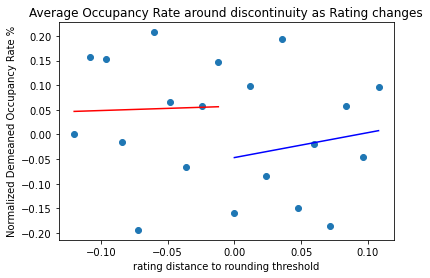

In [658]:

theta_up = np.polyfit(test_up["edges"], test_up["revpar_norm"], 1)
theta_down = np.polyfit(test_down["edges"], test_down["revpar_norm"], 1)
    
test_up["ln_revpar_fit"] = theta_up[1] + theta_up[0] * test_up["edges"]

test_down["ln_revpar_fit"] = theta_down[1] + theta_down[0] * test_down["edges"]

fig = plt.figure()
plt.scatter(df_plot_2["edges"], df_plot_2["revpar_norm"])
plt.plot(test_up["edges"], test_up["ln_revpar_fit"], 'r')
plt.plot(test_down["edges"], test_down["ln_revpar_fit"], 'b')

plt.title('Average Occupancy Rate around discontinuity as Rating changes')
plt.xlabel('rating distance to rounding threshold')
plt.ylabel('Normalized Demeaned Occupancy Rate %')

plt.show()


/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

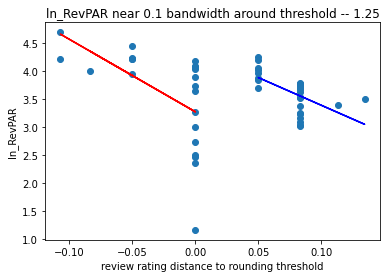

/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

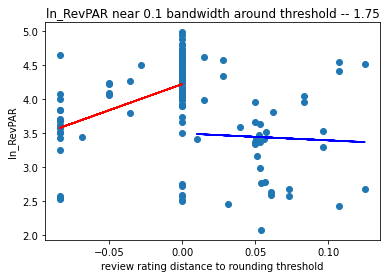

/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

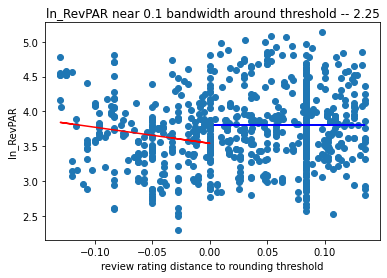

/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

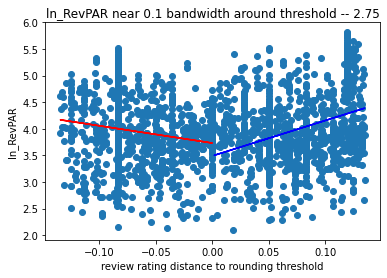

/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

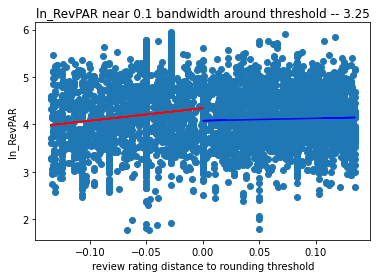

/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

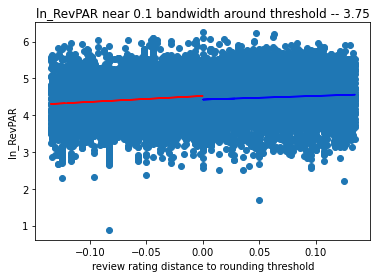

/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

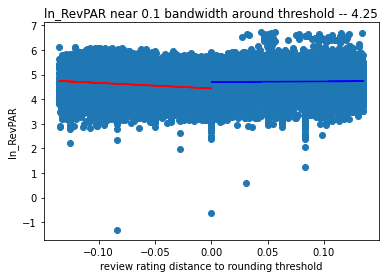

/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

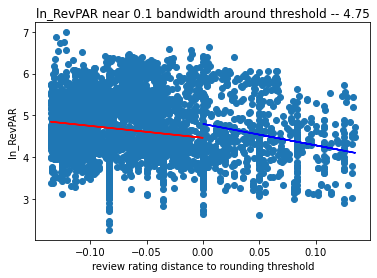

In [594]:

for i in threshold_name:
    test = plot_dict[i]
    test["distance_to_threshold"] = test["accum_rating"] - float(i)
    test_up = test[test["distance_to_threshold"]<=0]
    test_down = test[test["distance_to_threshold"]>0]
    theta_up = np.polyfit(test_up["distance_to_threshold"], test_up["ln_revpar"], 1)
    theta_down = np.polyfit(test_down["distance_to_threshold"], test_down["ln_revpar"], 1)

    test_up["ln_revpar_fit"] = theta_up[1] + theta_up[0] * test_up["distance_to_threshold"]

    test_down["ln_revpar_fit"] = theta_down[1] + theta_down[0] * test_down["distance_to_threshold"]
    
    fig = plt.figure()
    plt.scatter(test["distance_to_threshold"], test["ln_revpar"])
    plt.plot(test_up["distance_to_threshold"], test_up["ln_revpar_fit"], 'r')
    plt.plot(test_down["distance_to_threshold"], test_down["ln_revpar_fit"], 'b')

    plt.title('ln_RevPAR near 0.1 bandwidth around threshold -- {}'.format(i))
    plt.xlabel('review rating distance to rounding threshold')
    plt.ylabel('ln_RevPAR')
    
    fig.savefig(os.path.join(parent+"/output/plots/rdd_plots", r"rounding_{}.jpg".format(i)),
                format='jpeg',
                dpi=100,
                bbox_inches='tight')
    plt.show()

In [102]:
df_175

,shareid,year_month,Supply,Demand,Revenue,Occ,ADR,RevPAR,Country,Market,...,ln_revenue_next_3m,ln_revpar_next_3m,ln_revenue_next_3m_avg,ln_revpar_next_3m_avg,year,month,round_up,round_down,rounding_threshold,distance_to_threshold
4737,1633021,2004-08-01,5332.0,4228.0,409655.0,79.2948,96.890965,76.829520,United States,"Chicago, IL",...,12.886104,4.337412,12.995048,4.435426,2004,8,True,False,r_175,0.527778
4738,1633021,2004-09-01,5160.0,4435.0,500259.0,85.9496,112.797971,96.949419,United States,"Chicago, IL",...,12.321520,3.740038,12.727927,4.157375,2004,9,True,False,r_175,0.527778
5198,1993259,2004-03-01,26598.0,23100.0,2977467.0,86.8486,128.894675,111.943266,United States,"Chicago, IL",...,14.963949,4.808148,14.896258,4.729526,2004,3,True,False,r_175,0.500000
1074,84776,2011-07-01,4061.0,2079.0,79585.0,51.1942,38.280423,19.597390,United States,"Houston, TX",...,10.876272,2.567088,10.948521,2.650267,2011,7,True,False,r_175,0.568182
1075,84776,2011-08-01,4061.0,1654.0,65002.0,40.7288,39.299879,16.006402,United States,"Houston, TX",...,10.858768,2.582373,10.874053,2.586728,2011,8,True,False,r_175,0.568182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,6354885,2009-02-01,4004.0,3191.0,430732.0,79.6953,134.983391,107.575425,United States,"Miami/Hialeah, FL",...,12.636708,4.239876,12.815238,4.429336,2009,2,False,True,r_175,0.404762
3838,6354885,2009-03-01,4433.0,3391.0,418135.0,76.4944,123.307284,94.323257,United States,"Miami/Hialeah, FL",...,12.454818,4.090776,12.652324,4.277352,2009,3,False,True,r_175,0.432353
3839,6354885,2009-04-01,4290.0,3655.0,386716.0,85.1981,105.804651,90.143590,United States,"Miami/Hialeah, FL",...,12.583073,4.186241,12.558200,4.172298,2009,4,False,True,r_175,0.443182
3840,6354885,2009-05-01,4433.0,3350.0,307647.0,75.5695,91.834925,69.399278,United States,"Miami/Hialeah, FL",...,12.533861,4.137029,12.523917,4.138015,2009,5,False,True,r_175,0.486264


<AxesSubplot:xlabel='distance_to_cutoff', ylabel='ln_revpar_next_1m'>

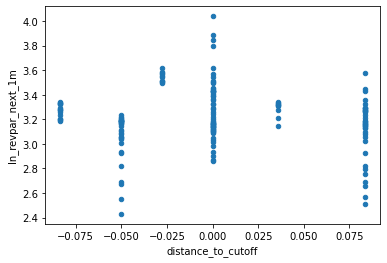

In [503]:
df_125.plot.scatter(x="distance_to_cutoff",y="ln_revpar_next_1m")

<AxesSubplot:xlabel='accum_rating', ylabel='ln_revpar_next_1m'>

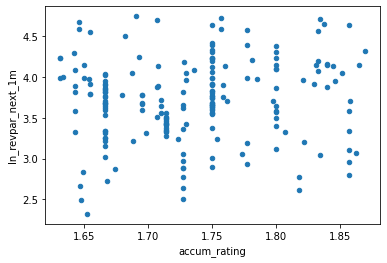

In [504]:
df_175.plot.scatter(x="accum_rating",y="ln_revpar_next_1m")

<AxesSubplot:xlabel='accum_rating', ylabel='ln_revpar_next_1m'>

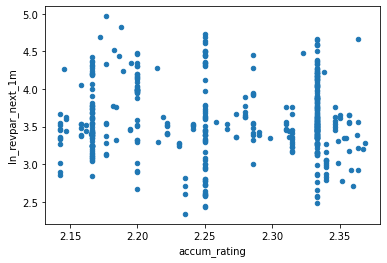

In [505]:
df_225.plot.scatter(x="accum_rating",y="ln_revpar_next_1m")

<AxesSubplot:xlabel='accum_rating', ylabel='ln_revpar_next_1m'>

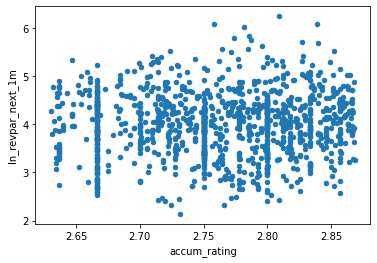

In [506]:
df_275.plot.scatter(x="accum_rating",y="ln_revpar_next_1m")

<AxesSubplot:xlabel='accum_rating', ylabel='ln_revpar_next_1m'>

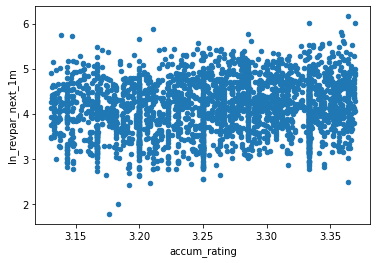

In [507]:
df_325.plot.scatter(x="accum_rating",y="ln_revpar_next_1m")

<AxesSubplot:xlabel='accum_rating', ylabel='ln_revpar_next_1m'>

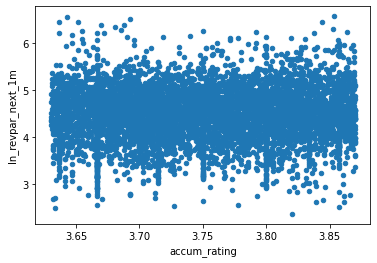

In [508]:
df_375.plot.scatter(x="accum_rating",y="ln_revpar_next_1m")

<AxesSubplot:xlabel='accum_rating', ylabel='ln_revpar_next_1m'>

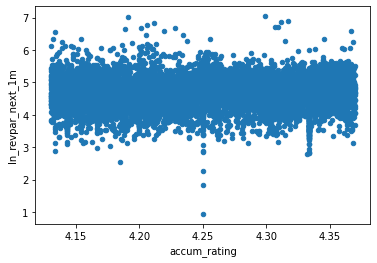

In [509]:
df_425.plot.scatter(x="accum_rating",y="ln_revpar_next_1m")

<AxesSubplot:xlabel='accum_rating', ylabel='ln_revpar_next_1m'>

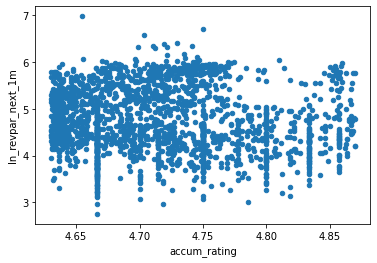

In [510]:
df_475.plot.scatter(x="accum_rating",y="ln_revpar_next_1m")

In [60]:
pd.concat([df_125,df_175,df_225,df_275,df_325,df_375,df_425,df_475],axis=0).shape

(17898, 42)

In [374]:
# Save data
output_dir = parent+r"/data/rdd_data"

df.to_csv(os.path.join(output_dir,r"rdd_data_005_bandwidth.csv"), index = False, encoding='utf-8')


df_125.to_csv(os.path.join(output_dir,r"rdd_125_005_bandwidth.csv"), index = False, encoding='utf-8')
df_175.to_csv(os.path.join(output_dir,r"rdd_175_005_bandwidth.csv"), index = False, encoding='utf-8')
df_225.to_csv(os.path.join(output_dir,r"rdd_225_005_bandwidth.csv"), index = False, encoding='utf-8')
df_275.to_csv(os.path.join(output_dir,r"rdd_275_005_bandwidth.csv"), index = False, encoding='utf-8')
df_325.to_csv(os.path.join(output_dir,r"rdd_325_005_bandwidth.csv"), index = False, encoding='utf-8')
df_375.to_csv(os.path.join(output_dir,r"rdd_375_005_bandwidth.csv"), index = False, encoding='utf-8')
df_425.to_csv(os.path.join(output_dir,r"rdd_425_005_bandwidth.csv"), index = False, encoding='utf-8')
df_475.to_csv(os.path.join(output_dir,r"rdd_475_005_bandwidth.csv"), index = False, encoding='utf-8')



In [577]:
# Save data
output_dir = parent+r"/data/rdd_data"

df.to_csv(os.path.join(output_dir,r"rdd_data_010_bandwidth_2014.csv"), index = False, encoding='utf-8')


df_125.to_csv(os.path.join(output_dir,r"rdd_125_010_bandwidth.csv"), index = False, encoding='utf-8')
df_175.to_csv(os.path.join(output_dir,r"rdd_175_010_bandwidth.csv"), index = False, encoding='utf-8')
df_225.to_csv(os.path.join(output_dir,r"rdd_225_010_bandwidth.csv"), index = False, encoding='utf-8')
df_275.to_csv(os.path.join(output_dir,r"rdd_275_010_bandwidth.csv"), index = False, encoding='utf-8')
df_325.to_csv(os.path.join(output_dir,r"rdd_325_010_bandwidth.csv"), index = False, encoding='utf-8')
df_375.to_csv(os.path.join(output_dir,r"rdd_375_010_bandwidth.csv"), index = False, encoding='utf-8')
df_425.to_csv(os.path.join(output_dir,r"rdd_425_010_bandwidth.csv"), index = False, encoding='utf-8')
df_475.to_csv(os.path.join(output_dir,r"rdd_475_010_bandwidth.csv"), index = False, encoding='utf-8')



In [421]:
# Save data
output_dir = parent+r"/data/rdd_data"

df.to_csv(os.path.join(output_dir,r"rdd_data_001_bandwidth.csv"), index = False, encoding='utf-8')


df_125.to_csv(os.path.join(output_dir,r"rdd_125_001_bandwidth.csv"), index = False, encoding='utf-8')
df_175.to_csv(os.path.join(output_dir,r"rdd_175_001_bandwidth.csv"), index = False, encoding='utf-8')
df_225.to_csv(os.path.join(output_dir,r"rdd_225_001_bandwidth.csv"), index = False, encoding='utf-8')
df_275.to_csv(os.path.join(output_dir,r"rdd_275_001_bandwidth.csv"), index = False, encoding='utf-8')
df_325.to_csv(os.path.join(output_dir,r"rdd_325_001_bandwidth.csv"), index = False, encoding='utf-8')
df_375.to_csv(os.path.join(output_dir,r"rdd_375_001_bandwidth.csv"), index = False, encoding='utf-8')
df_425.to_csv(os.path.join(output_dir,r"rdd_425_001_bandwidth.csv"), index = False, encoding='utf-8')
df_475.to_csv(os.path.join(output_dir,r"rdd_475_001_bandwidth.csv"), index = False, encoding='utf-8')
